In [43]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
conn = engine.connect()

In [12]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [13]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [15]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [16]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
#Checking the columns in measurement class
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#Checking the columns in station class
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
most_recent_date=session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

<AxesSubplot:xlabel='date'>

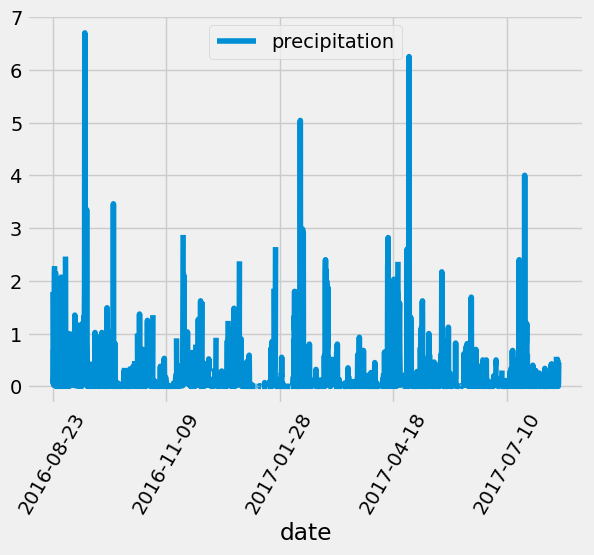

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
prev_year=dt.date(2017,8,23)-dt.timedelta(days=365)
results=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=prev_year).all()
df=pd.DataFrame(results,columns=['date','precipitation'])
df=df.sort_values("date")
df.plot(x='date',y="precipitation",rot=60)


In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
Base = automap_base()
Base.prepare(engine, reflect=True)
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc())
for row in most_active_stations:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs))\
              .filter(Measurement.station == 'USC00519281')\
              .scalar()
highest_temp = session.query(func.max(Measurement.tobs))\
               .filter(Measurement.station == 'USC00519281')\
               .scalar()
avg_temp = session.query(func.avg(Measurement.tobs))\
           .filter(Measurement.station == 'USC00519281')\
           .scalar()

print(f"Lowest temperature: {lowest_temp}")
print(f"Highest temperature: {highest_temp}")
print(f"Average temperature: {avg_temp}")

Lowest temperature: 54.0
Highest temperature: 85.0
Average temperature: 71.66378066378067


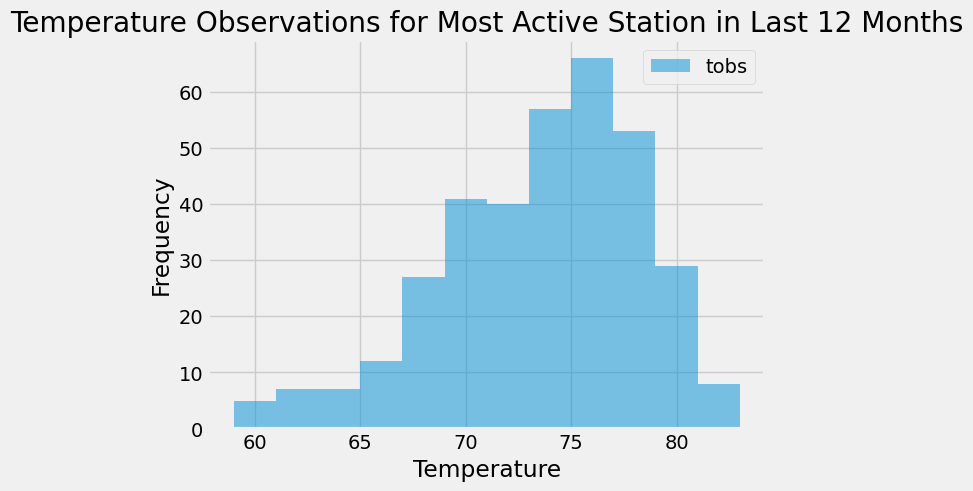

In [45]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps = conn.execute(f"SELECT tobs FROM measurement WHERE date >= '{prev_year}' AND station = '{most_active_station}'").fetchall()

# Convert the results to a DataFrame and plot the histogram
df = pd.DataFrame(temps, columns=['tobs'])
df.plot.hist(bins=12, alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations for Most Active Station in Last 12 Months')
plt.show()

# Close Session

In [46]:
# Close Session
session.close()